# 1- Addition to Flat file (Adding variables) 

Most of the variables have been added in the SQL section, but for adding some variables we need python. I add these variables in this section, that these variables will be available in EDA and Data cleansing.  This pre-EDA section.


In [1]:
# Import libraries:
import pyodbc
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob, Word, Blobber

In [2]:
### Using the ODBC:
driver_name = "SQL Server Native Client 11.0"
server = "ITZIK\SQLEXPRESS"
dbname = "Berlin"

In [3]:
pd.set_option('display.max_rows', 200 , 'display.max_columns', 200)

In [4]:
### read the data:

conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))



df = pd.read_sql_query('SELECT * FROM db01.FINAL_TABLE',conn)


In [5]:
#Displaying the first 3 rows of dataframe using head() method:
df.head(3)

,listing_id,name,target_start_date_period,target_end_date_period,target_num_of_day_in_period,target_num_of_booked_days,booked_up_target,target_avg_dollar_price_in_period,start_date_previous_period,end_date_previous_period,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,occupancy_last_period,avg_dollar_price_in_previous_period,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,DaysPassed_last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,last_scraped,summary,space,description,experiences_offered,notes,transit,access,interaction,house_rules,neighborhood_overview,host_about,host_since,DaysPassed_host_since,picture_url,host_url,host_location,host_response_time,host_response_rate,host_acceptance_rate,xl_picture_url,medium_url,thumbnail_url,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,market,country_code,country,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,first_review,DaysPassed_first_review,calendar_last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,concat_comments
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2019-02-01,2019-04-30,89,0,0,76.5168,2018-11-07,2019-01-31,86,39,0.45,92.6808,2217.0,Ian,Mitte,Brunnenstr. S��d,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,1030.0,3.76,4.0,141.0,https://www.airbnb.com/rooms/2015,2018-11-07,Great location! 30 of 75 sq meters. This wood...,A+++ location! This ���Einliegerwohnung��� is ...,Great location! 30 of 75 sq meters. This wood...,none,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",It is located in the former East Berlin area o...,Believe in sharing economy.,2008-08-18,4753.0,https://a0.muscache.com/im/pictures/260fd609-7...,https://www.airbnb.com/users/show/2217,"Key Biscayne, Florida, United States",within an hour,0.96,N/A,None,None,None,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Brunnenstr. S��d,Mitte,Berlin,Berlin,10119.0,"Berlin, Germany",Berlin,DE,Germany,f,Guesthouse,3.0,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,None,None,$200.00,$30.00,1.0,$28.00,1125.0,3 months ago,0.0,21.0,51.0,2016-04-11,1960.0,2018-11-07,93.0,10.0,9.0,10.0,10.0,10.0,9.0,None,None,f,f,f,f,strict_14_with_grace_period,##������������ ��������� ��������� ������ ����...
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2019-03-01,2019-05-31,92,26,0,76.6212,2018-11-07,2019-02-28,114,39,0.34,86.5466,2217.0,Ian,Mitte,Brunnenstr. S��d,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,1030.0,3.76,4.0,141.0,https://www.airbnb.com/rooms/2015,2018-11-07,Great location! 30 of 75 sq meters. This wood...,A+++ location! This ���Einliegerwohnung��� is ...,Great location! 30 of 75 sq meters. This wood...,none,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties N

In [6]:
df["listing_id"] = df["listing_id"].astype('int')
df["host_id"] = df["host_id"].astype('int')

In [7]:
# Each listing_id has 7 records in df. 
# Adding Features based on "description" and "concat_comments"

# selecting colums that desribe the property/listening (this is equvalenet to agg first)
df_unique_listings = df[['listing_id',  'description', 'concat_comments']]

# Drop Duplicates
df_unique_listings = df_unique_listings.drop_duplicates('listing_id')

print("df num of records:", len(df))
print("df_unique_listings num of records: ", len(df_unique_listings), "Each listing_id appears:", len(df)/len(df_unique_listings))
df_unique_listings.head(3)

df num of records: 157864
df_unique_listings num of records:  22552 Each listing_id appears: 7.0


,listing_id,description,concat_comments
0,2015,Great location! 30 of 75 sq meters. This wood...,##������������ ��������� ��������� ������ ����...
7,2695,In the summertime we are spending most of our ...,##I really enjoyed staying at Micha and Nadja'...
14,3309,First of all: I prefer short-notice bookings. ...,"##�� �������� �� ������ 4 ������������, �� 22 ..."


In [8]:
df_unique_listings = df_unique_listings.reset_index(drop=True)


### Extracting size from description column

In [9]:
# extracting numbers that present the size from the description column
df_unique_listings['size'] = df_unique_listings['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_unique_listings['size'] = df_unique_listings['size'].str.replace("\D", "")

# change datatype of size into float
df_unique_listings['size'] = df_unique_listings['size'].astype(float)


C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_unique_listings[['description', 'size']].head(10)

,description,size
0,Great location! 30 of 75 sq meters. This wood...,75.0
1,In the summertime we are spending most of our ...,25.0
2,First of all: I prefer short-notice bookings. ...,26.0
3,Cozy and large room in the beautiful district ...,20.0
4,4 bedroom with very large windows and outstand...,780.0
5,The apartment is located on the upper second f...,NaN
6,The 25 sqm room is located in the heart of Ber...,25.0
7,- beautiful studio apt in downtown Berlin - br...,16.0
8,Bright and sunny condo with two balconies in a...,NaN
9,Light and sunny 1-Room-turn of the century-fla...,NaN


In [11]:
print("number of na(s):", df_unique_listings[['size']].isna().sum()[0], "( Out of", len(df_unique_listings), ")")

number of na(s): 11797 ( Out of 22552 )


## Retrieving the sentiment of "concat_comments"

In this section, we will analyze the sentiment of visitors' comments in order to understand their level of satisfaction with the property.

For analyzing sentiments linguistic experts have build a dictionary of the most common used words in each language and have given each word a value determining the degree of positiveness, negativeness of neutrality of each word. The total sentiment of a text is calculated by averaging the sentiment of all the words that compose the text. This measure is expressed as the <i>Polarity</i> of the text and can range from -1 for highly negative sentiment to +1 for highly positive sentiment. 
 
Additionally, some words are known to expose the subjectivity of a statement. For example the word <i> think </i> is highly subjective and points to a personal opinion while the word <i> know </i> is pointing to some kind of information and has lower subjectivity. The subjectivity measure ranges from 0 to 1.




In [12]:
# printing the first concat comments:
print(df.loc[0,'concat_comments'])


##������������ ��������� ��������� ������ ������ 10������������ 11��������� ������������ ��� ��������� ��������� ������������������! ��������������� ������ ��������������� ��������������� ������! ������ ������������ ��������������� ��� ������ 1��������� ������ ��������� ������������ ������ ������������������~ ������!!!!!!!!!!!!!!!!!###������������ ��������� ������������������. ��������� ��������������� ������������ ������������������������### My staying at Jan's was perfect: the apartment is exactly as described, is located in an amazing area, very easy to reach and close by many restaurants, bars, shops.&#x0D;
Jan was very helpful and friendly in giving all kind of tips: how to reach the apartment, good restaurants nearby etc.&#x0D;
Surely I would contact him again for my next stay in Berlin!###A fantastic quiet location &amp; a lovely apartment. Great communication with Jan. ###A nice and comfortable place, central but quiet.###Alles mehr als Bestens. Jan ist ein super Gastgeber, die

### Calculating the sentiment of each property overview 

In [13]:
# Sentiment Analysis
# adding polarity and subjectivity to dataframe base on "concat_comments"


def get_polarity_subjectivity(text: str) -> list:
    """
    Processing textual data with TextBlob for getting polarity, subjectivity base on a text.
    (This method can be used with pandas apply )
    if text is null or number - the polarity and subjectivity are neutral [0,0]
    """
    if text is None or text == "" or type(text) is not str :
        return [None, None]
    text_blob_obj = TextBlob(str(text))
    polarity = text_blob_obj.sentiment[0]
    subjectivity = text_blob_obj.sentiment[1]
    return [polarity, subjectivity]


def add_polarity_subjectivity_columns(df_src: pd.DataFrame, src_col_name: str, polarity_target_col_name: str = 'polarity' , subjectivity_target_col_name: str = 'subjectivity') -> pd.DataFrame:
    """
    Base on text column adding polarity and subjectivity columns to dataframe.
    """
    df_src['sentiment_array_temp'] = df_src[src_col_name].apply(get_polarity_subjectivity)
    df_src[[polarity_target_col_name,subjectivity_target_col_name]] = pd.DataFrame(df_unique_listings['sentiment_array_temp'].tolist(), index= df_unique_listings.index)
    df_src.drop(['sentiment_array_temp'], axis=1, inplace=True)
    return df_src

In [14]:
df.loc[0,'concat_comments']

'##������������ ��������� ��������� ������ ������ 10������������ 11��������� ������������ ��� ��������� ��������� ������������������! ��������������� ������ ��������������� ��������������� ������! ������ ������������ ��������������� ��� ������ 1��������� ������ ��������� ������������ ������ ������������������~ ������!!!!!!!!!!!!!!!!!###������������ ��������� ������������������. ��������� ��������������� ������������ ������������������������### My staying at Jan\'s was perfect: the apartment is exactly as described, is located in an amazing area, very easy to reach and close by many restaurants, bars, shops.&#x0D;\nJan was very helpful and friendly in giving all kind of tips: how to reach the apartment, good restaurants nearby etc.&#x0D;\nSurely I would contact him again for my next stay in Berlin!###A fantastic quiet location &amp; a lovely apartment. Great communication with Jan. ###A nice and comfortable place, central but quiet.###Alles mehr als Bestens. Jan ist ein super Gastgeber,

In [15]:
# Testing get_polarity_subjectivity
#1. legimiate Value
polarity_subjectivity_list = get_polarity_subjectivity(df.loc[0,'concat_comments'])
assert -1 <= polarity_subjectivity_list[0] and polarity_subjectivity_list[0] <= 1
assert -1 <= polarity_subjectivity_list[1] and polarity_subjectivity_list[1] <= 1
print("polarity_subjectivity_list in case of string:", polarity_subjectivity_list)


#2. float number (this method expect string)
polarity_subjectivity_list = get_polarity_subjectivity(0.999)
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None

print("polarity_subjectivity_list in case of 0.999:", polarity_subjectivity_list)

#3. None and empty string
polarity_subjectivity_list = get_polarity_subjectivity(None)
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None
print("polarity_subjectivity_list in case of None:", polarity_subjectivity_list)

polarity_subjectivity_list = get_polarity_subjectivity("")
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None
print("polarity_subjectivity_list in case of empty string:", polarity_subjectivity_list)


polarity_subjectivity_list in case of string: [0.3585527657527653, 0.5605763668430337]
polarity_subjectivity_list in case of 0.999: [None, None]
polarity_subjectivity_list in case of None: [None, None]
polarity_subjectivity_list in case of empty string: [None, None]


In [16]:
df_unique_listings = add_polarity_subjectivity_columns(df_src=df_unique_listings, 
                                  src_col_name="concat_comments", 
                                  polarity_target_col_name="concat_comments_polarity",
                                  subjectivity_target_col_name="concat_comments_subjectivity")

In [17]:
df_unique_listings

,listing_id,description,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity
0,2015,Great location! 30 of 75 sq meters. This wood...,##������������ ��������� ��������� ������ ����...,75.0,0.358553,0.560576
1,2695,In the summertime we are spending most of our ...,##I really enjoyed staying at Micha and Nadja'...,25.0,0.390022,0.634123
2,3309,First of all: I prefer short-notice bookings. ...,"##�� �������� �� ������ 4 ������������, �� 22 ...",26.0,0.302466,0.516235
3,7071,Cozy and large room in the beautiful district ...,##������ ������������ ������������ �����������...,20.0,0.387032,0.606783
4,9991,4 bedroom with very large windows and outstand...,##Nous avons pass�� une agr��able semaine avec...,780.0,0.457673,0.665630
...,...,...,...,...,...,...
22547,27014280,"Hello, I rent my library room in central Kreuz...",None,10.0,NaN,NaN
22548,27050512,We are three students from Berlin and lost our...,None,NaN,NaN,NaN
22549,27070483,Enjoy this peaceful and quiet oasis in the hea...,None,20.0,NaN,NaN
22550,29810921,Bushaltestelle (Barbarossastra��e) direkt vor ...,None,60.0,NaN,NaN


In [18]:
#Adding sentiment column base on polarity column
# Getting positive, negative or netural sentiment base on thresholds.

def get_sentiment(polarity: float, negative_threshold: float = -0.05, positive_threshold: float = 0.05) -> int:
    """
    polarity expected valuesim range of [-1,1] or None
    """
    if polarity < negative_threshold:
        return "negative_sentiment"
    elif polarity > positive_threshold:
        return "positive_sentiment"
    elif polarity >= -1 and polarity <= 1:
        return "neutral_sentiment"
    elif pd.isna(polarity): # is None
        return None
    else:
        raise Exception("Unexpected polarity: " + str(polarity))

df_unique_listings["concat_comments_sentiment"] = df_unique_listings["concat_comments_polarity"].apply(get_sentiment)
df_unique_listings["concat_comments_sentiment"] = df_unique_listings["concat_comments_sentiment"].astype('category')

In [19]:
df_unique_listings.head()

,listing_id,description,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity,concat_comments_sentiment
0,2015,Great location! 30 of 75 sq meters. This wood...,##������������ ��������� ��������� ������ ����...,75.0,0.358553,0.560576,positive_sentiment
1,2695,In the summertime we are spending most of our ...,##I really enjoyed staying at Micha and Nadja'...,25.0,0.390022,0.634123,positive_sentiment
2,3309,First of all: I prefer short-notice bookings. ...,"##�� �������� �� ������ 4 ������������, �� 22 ...",26.0,0.302466,0.516235,positive_sentiment
3,7071,Cozy and large room in the beautiful district ...,##������ ������������ ������������ �����������...,20.0,0.387032,0.606783,positive_sentiment
4,9991,4 bedroom with very large windows and outstand...,##Nous avons pass�� une agr��able semaine avec...,780.0,0.457673,0.665630,positive_sentiment


In [20]:
print("num of nas", df_unique_listings['concat_comments_sentiment'].isna().sum())
df_unique_listings.groupby(by=['concat_comments_sentiment'],dropna=False).count()['concat_comments_polarity']

num of nas 10387


concat_comments_sentiment
negative_sentiment       31
neutral_sentiment       560
positive_sentiment    11574
Name: concat_comments_polarity, dtype: int64

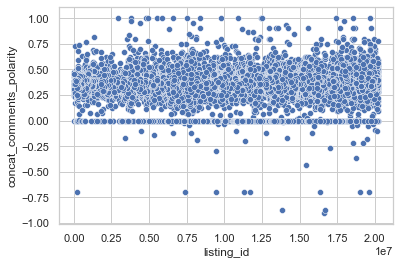

In [21]:
#Let's see in the graph the polarity variable distribution
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_unique_listings, x='listing_id', y='concat_comments_polarity')

In [22]:
# enrich flat table with columns 'size','concat_comments_polarity', 'concat_comments_subjectivity','concat_comments_sentiment'
df = df.merge(df_unique_listings[['listing_id', 'size','concat_comments_polarity', 'concat_comments_subjectivity','concat_comments_sentiment']],  how='inner', on='listing_id')

In [23]:
df.head()

,listing_id,name,target_start_date_period,target_end_date_period,target_num_of_day_in_period,target_num_of_booked_days,booked_up_target,target_avg_dollar_price_in_period,start_date_previous_period,end_date_previous_period,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,occupancy_last_period,avg_dollar_price_in_previous_period,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,DaysPassed_last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,last_scraped,summary,space,description,experiences_offered,notes,transit,access,interaction,house_rules,neighborhood_overview,host_about,host_since,DaysPassed_host_since,picture_url,host_url,host_location,host_response_time,host_response_rate,host_acceptance_rate,xl_picture_url,medium_url,thumbnail_url,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,market,country_code,country,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,first_review,DaysPassed_first_review,calendar_last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity,concat_comments_sentiment
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2019-02-01,2019-04-30,89,0,0,76.5168,2018-11-07,2019-01-31,86,39,0.45,92.6808,2217,Ian,Mitte,Brunnenstr. S��d,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,1030.0,3.76,4.0,141.0,https://www.airbnb.com/rooms/2015,2018-11-07,Great location! 30 of 75 sq meters. This wood...,A+++ location! This ���Einliegerwohnung��� is ...,Great location! 30 of 75 sq meters. This wood...,none,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",It is located in the former East Berlin area o...,Believe in sharing economy.,2008-08-18,4753.0,https://a0.muscache.com/im/pictures/260fd609-7...,https://www.airbnb.com/users/show/2217,"Key Biscayne, Florida, United States",within an hour,0.96,N/A,None,None,None,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Brunnenstr. S��d,Mitte,Berlin,Berlin,10119.0,"Berlin, Germany",Berlin,DE,Germany,f,Guesthouse,3.0,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,None,None,$200.00,$30.00,1.0,$28.00,1125.0,3 months ago,0.0,21.0,51.0,2016-04-11,1960.0,2018-11-07,93.0,10.0,9.0,10.0,10.0,10.0,9.0,None,None,f,f,f,f,strict_14_with_grace_period,##������������ ��������� ��������� ������ ����...,75.0,0.358553,0.560576,positive_sentiment
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2019-03-01,2019-05-31,92,26,0,76.6212,2018-11-07,2019-02-28,114,39,0.34,86.5466,2217,Ian,Mitte,Brunnenstr. S��d,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,1030.0,3.76,4.0,141.0,https://www.airbnb.com/rooms/2015,2018-11-07,Great location! 30 of 75 sq meters. This wood...,A+++ location! This ���Einliegerwohnung��� is ...,Great location! 30 of 75 sq meters. This wood...,none,"This is my home, not a hotel. I rent out occas...","Close to U

In [24]:
df.to_csv("flat_file.csv")